In [2]:
import os
import pandas as pd
import collections
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import re

In [20]:
meta = pd.read_pickle('../obj/meta.pkl')

In [ ]:
def aggregate_by_year(df: pd.DataFrame, 
                    colname: str):

    aggr = df[[colname]].copy()
    aggr[colname] = pd.to_datetime(aggr[colname])
    aggr['year'] = aggr[colname].dt.year.astype(int)
    by_year = aggr.groupby('year').size()
    
    return by_year

def plot_over_time(by_year: pd.DataFrame):

    plt.figure(figsize=(10, 6))
    plt.bar(by_year.index, by_year.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of AU fics')
    plt.title('Number of AU fics posted to AO3 by year')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(MultipleLocator(1)) # so plt doesn't get creative with x axis
    plt.show()

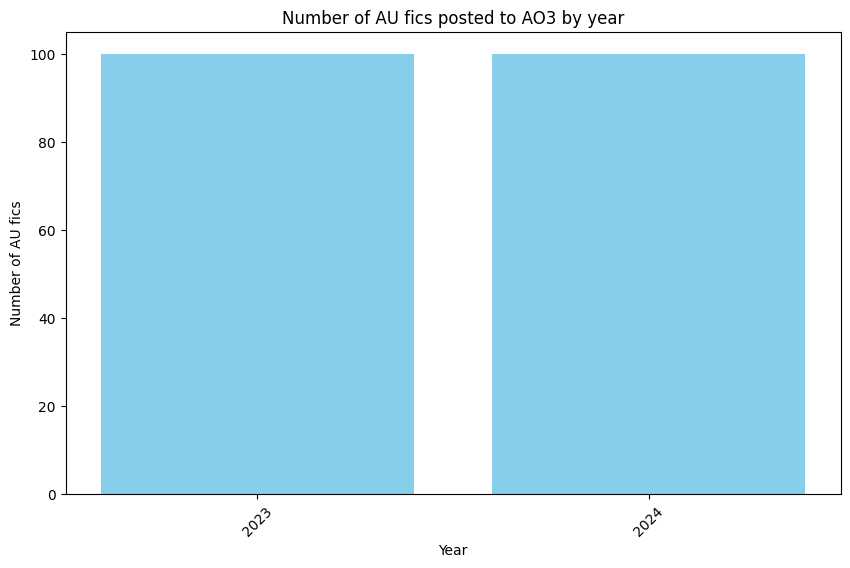

In [41]:
yearly = aggregate_by_year(meta, 'status date')
plot_over_time(yearly)

In [ ]:
aggr = meta[['status date']].copy()
aggr['status date'] = pd.to_datetime(aggr['status date'])
aggr['year_month'] = aggr['status date'].dt.to_period('M').dt.to_timestamp()
aggr['year'] = aggr['status date'].dt.year.astype(int)
by_month = aggr.groupby('year_month').size()
by_year = aggr.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.bar(by_year.index, by_year.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Month')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(1)) # so plt doesn't get creative with x axis
plt.show()